# 互评作业一：数据探索性分析与数据预处理

**姓名**：王英杰  
**学号**：5720201111  

# 目录

### 1. 数据集1：Wine Reviews
**1.1 数据摘要**  
- 数据信息  
- 缺失值统计  
- 数值数据摘要  
- 标称属性摘要  

**1.2 数据可视化**  
- 直方图
- q-q图
- 盒图  

**1.3 处理缺失数据**  
- 处理缺失标称数据  
- 处理缺失数值数据  

### 2. 数据集2：Oakland Crime Statistics 2011 to 2016
**2.1 数据摘要**  
- 数据信息  
- 缺失值统计  
- 数值数据摘要  
- 标称属性摘要  

**2.2 处理缺失数据**  
- 处理缺失标称数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1. 数据集1：Wine Reviews

**加载数据**

In [2]:
data = pd.read_csv("winemag-data-130k-v2.csv")

## 1.1 数据摘要

包括“数据信息”、“缺失值统计”、“数值数据摘要”、“标称数据摘要”共4部分。

### 数据信息

数据集中共有14列，129971行。其中有3列是数值属性，11列是标称属性。

In [3]:
print('%d columns' % len(data.columns))
print('%d rows' % len(data.index))
print(data.dtypes.value_counts())

14 columns
129971 rows
object     11
int64       2
float64     1
dtype: int64


数据的前5行展示如下：

In [4]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


**缺失值统计**


统计每一个属性的缺失值总数。

In [5]:
data.isna().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

**数值数据摘要**

数值属性的总数、均值、标准差以及五数概括如下所示。其中第一列为数据id，不予考虑。

In [6]:
data.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


**标称属性摘要**

定义`summary_column(col_name)`函数，统计标称属性`col_name`中不同值出现的频数和频率，并展示出现频率最高的前15个值。

In [7]:
def summary_column(col_name):
    col = data[col_name].value_counts()
    print('Colunm name:', col_name)
    print('%d different values.' % len(col))
    print()
    col = data[col_name].value_counts()
    col_data = col.to_frame()
    col_data['frequency'] = col.apply(lambda x: x / len(data.index))
    col_data.rename(columns={col_name: 'counts'}, inplace=True)
    if len(col)>15:
       print(col_data.iloc[:15])
       print('...')
    else:
        print(col_data.iloc[:len(col)])
    if len(col)>15:
       plt.bar(np.arange(15), col.iloc[:15])
    else: 
       plt.bar(np.arange(len(col)),col.iloc[:len(col)])
    plt.title(col_name)
    plt.show()

统计**country**属性如下所示。

Colunm name: country
43 different values.

              counts  frequency
US             54504   0.419355
France         22093   0.169984
Italy          19540   0.150341
Spain           6645   0.051127
Portugal        5691   0.043787
Chile           4472   0.034408
Argentina       3800   0.029237
Austria         3345   0.025737
Australia       2329   0.017919
Germany         2165   0.016658
New Zealand     1419   0.010918
South Africa    1401   0.010779
Israel           505   0.003885
Greece           466   0.003585
Canada           257   0.001977
...


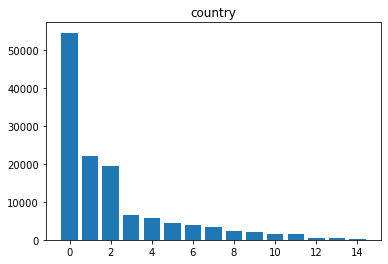

In [8]:
summary_column('country')

统计**designation**属性如下所示。

Colunm name: designation
37979 different values.

                 counts  frequency
Reserve            2009   0.015457
Estate             1322   0.010171
Reserva            1259   0.009687
Riserva             698   0.005370
Estate Grown        621   0.004778
Brut                513   0.003947
Dry                 413   0.003178
Barrel sample       375   0.002885
Crianza             343   0.002639
Estate Bottled      342   0.002631
Vieilles Vignes     308   0.002370
Brut Rosé           276   0.002124
Gran Reserva        261   0.002008
Barrel Sample       252   0.001939
Tradition           238   0.001831
...


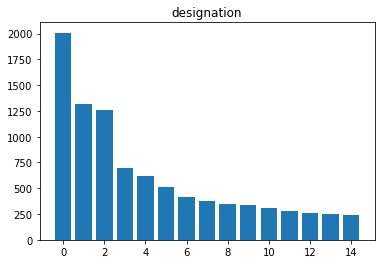

In [9]:
summary_column('designation')

统计**province**属性如下所示。

Colunm name: province
425 different values.

                    counts  frequency
California           36247   0.278885
Washington            8639   0.066469
Bordeaux              5941   0.045710
Tuscany               5897   0.045372
Oregon                5373   0.041340
Burgundy              3980   0.030622
Northern Spain        3851   0.029630
Piedmont              3729   0.028691
Mendoza Province      3264   0.025113
Veneto                2716   0.020897
New York              2688   0.020682
Alsace                2440   0.018773
Northeastern Italy    2138   0.016450
Loire Valley          1856   0.014280
Sicily & Sardinia     1797   0.013826
...


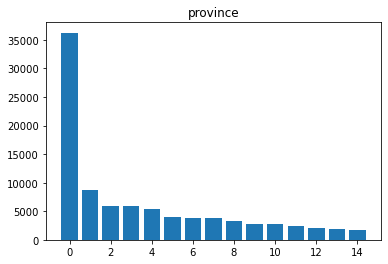

In [10]:
summary_column('province')

统计**taster_name**属性如下所示。

Colunm name: taster_name
19 different values.

                    counts  frequency
Roger Voss           25514   0.196305
Michael Schachner    15134   0.116441
Kerin O’Keefe        10776   0.082911
Virginie Boone        9537   0.073378
Paul Gregutt          9532   0.073339
Matt Kettmann         6332   0.048719
Joe Czerwinski        5147   0.039601
Sean P. Sullivan      4966   0.038209
Anna Lee C. Iijima    4415   0.033969
Jim Gordon            4177   0.032138
Anne Krebiehl MW      3685   0.028352
Lauren Buzzeo         1835   0.014119
Susan Kostrzewa       1085   0.008348
Mike DeSimone          514   0.003955
Jeff Jenssen           491   0.003778
...


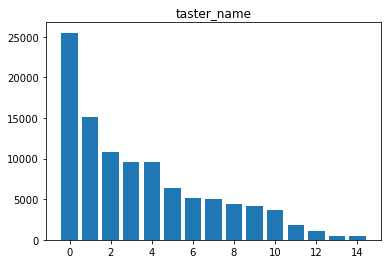

In [11]:
summary_column('taster_name')

统计**variety**属性如下所示。

Colunm name: variety
707 different values.

                          counts  frequency
Pinot Noir                 13272   0.102115
Chardonnay                 11753   0.090428
Cabernet Sauvignon          9472   0.072878
Red Blend                   8946   0.068831
Bordeaux-style Red Blend    6915   0.053204
Riesling                    5189   0.039924
Sauvignon Blanc             4967   0.038216
Syrah                       4142   0.031869
Rosé                        3564   0.027422
Merlot                      3102   0.023867
Nebbiolo                    2804   0.021574
Zinfandel                   2714   0.020882
Sangiovese                  2707   0.020828
Malbec                      2652   0.020405
Portuguese Red              2466   0.018973
...


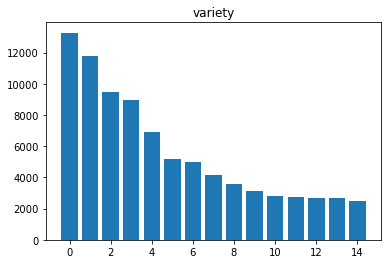

In [12]:
summary_column('variety')

## 1.2 数据可视化

包括“直方图”、“qq图”、“盒图”共3部分

定义函数`distribute(col_name)`，对指定数值属性列`distribute(col_name)`，首先展示其频率分布直方图，然后将其标准化为均值为0，方差为1的分布，与标准正态分布一起绘制qq图,最终，绘制其盒图。

In [13]:
def distribute(col_name):
    col = data[col_name].dropna()
    plt.hist(col, 20)
    plt.title(col_name)
    plt.show()
    
    col = (col - col.mean()) / col.std()
    fig = sm.qqplot(col, line='45')
    plt.title('q-q plot')
    plt.show()
    
    fig, ax = plt.subplots(figsize=(5, 6))
    ax.set_title(col_name)
    ax.boxplot(data[col_name].dropna())
    plt.show()

属性**points**展示如下。从q-q图可以看出，**points**的分布特性与正态分布类似。从直方图和盒图可以看出，**points**呈现正倾斜分布特性。

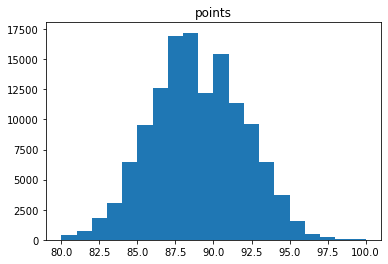

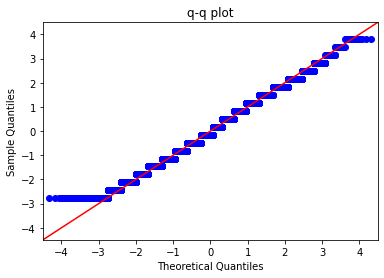

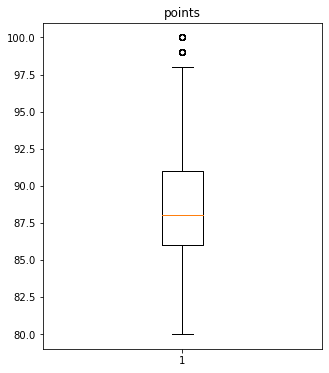

In [14]:
distribute('points')

属性**price**展示如下。从q-q图我们可以看出，**price**的分布特性与正态分布不类似。从直方图和盒图可以看出，**price**呈现出很强的正倾斜分布特性。

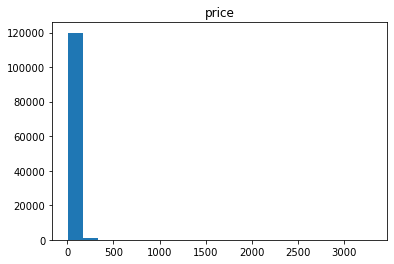

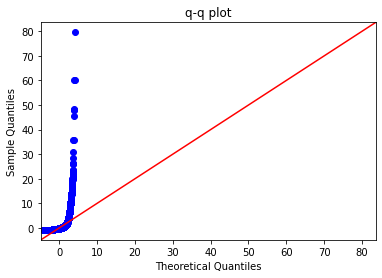

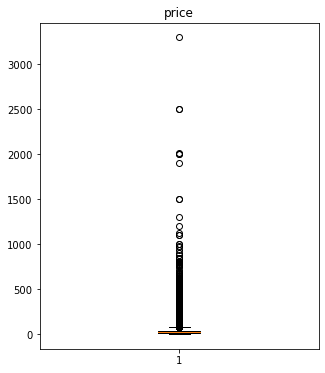

In [15]:
distribute('price')

## 1.3 处理缺失数据

包括“处理缺失标称数据”与“处理缺失数值数据”两部分。

### 处理缺失标称数据

定义函数`show_column(col)`来展示数据。

In [16]:
def show_column(col):
    col_value = col.value_counts()
    col_df = col_value.to_frame()
    col_df['frequency'] = col_value.apply(lambda x: x / len(col))
    if len(col_value)>15:
        print(col_df.iloc[:15])
        print('...')
    else:
        print(col_df.iloc[:15])
    if len(col_value)>15:
        plt.bar(np.arange(15), col_value.iloc[:15])
        plt.title(col_name)
        plt.show()
    else:
        plt.bar(np.arange(len(col_value)), col_value.iloc[:len(col_value)])
        plt.title(col_name)
        plt.show()

属性**designation**中共有129971个数据，其中37465个数据为空数据。

In [17]:
col_name = 'designation'
col = data[col_name]

print('column:', col_name)
print('total:', len(col))
print('nan:', col.isna().sum())

column: designation
total: 129971
nan: 37465


删除属性**designation**中的空数据，结果统计如下。

                 designation  frequency
Reserve                 2009   0.021718
Estate                  1322   0.014291
Reserva                 1259   0.013610
Riserva                  698   0.007545
Estate Grown             621   0.006713
Brut                     513   0.005546
Dry                      413   0.004465
Barrel sample            375   0.004054
Crianza                  343   0.003708
Estate Bottled           342   0.003697
Vieilles Vignes          308   0.003330
Brut Rosé                276   0.002984
Gran Reserva             261   0.002821
Barrel Sample            252   0.002724
Tradition                238   0.002573
...


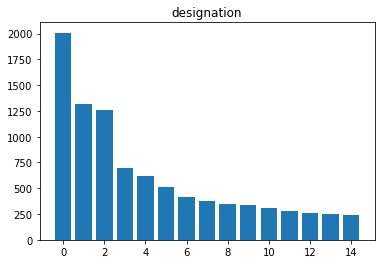

In [18]:
col_1 = col.dropna()
show_column(col_1)

属性**country**中共有129971个数据，其中63个数据为空数据。

In [19]:
col_name = 'country'
col = data[col_name]

print('column:', col_name)
print('total:', len(col))
print('nan:', col.isna().sum())

column: country
total: 129971
nan: 63


利用属性**country**中的众数来填补缺失值。

              country  frequency
US              54567   0.419840
France          22093   0.169984
Italy           19540   0.150341
Spain            6645   0.051127
Portugal         5691   0.043787
Chile            4472   0.034408
Argentina        3800   0.029237
Austria          3345   0.025737
Australia        2329   0.017919
Germany          2165   0.016658
New Zealand      1419   0.010918
South Africa     1401   0.010779
Israel            505   0.003885
Greece            466   0.003585
Canada            257   0.001977
...


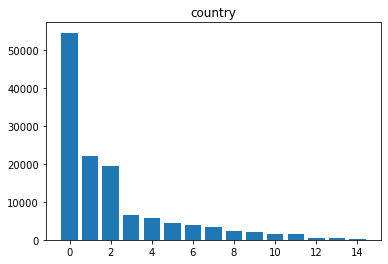

In [20]:
col_2 = col.fillna(col.mode()[0])
show_column(col_2)

### 处理缺失数值数据

**price**列中共有129971个数据，其中8996个数据为空数据。

In [21]:
col_name = 'price'
col = data[col_name]

print('column:', col_name)
print('total:', len(col))
print('nan:', col.isna().sum())

column: price
total: 129971
nan: 8996


绘制属性**points**和**price**的散点图，发现两者并未呈现很强的线性关系。

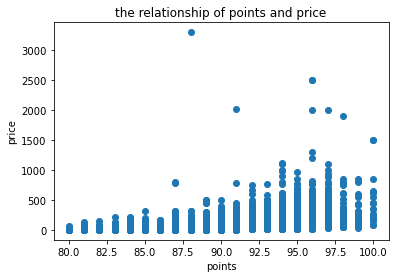

In [22]:
points = data['points']
price = data['price']
plt.xlabel('points')
plt.ylabel('price')
plt.title('the relationship of points and price')
plt.scatter(points, price)
plt.show()

首先，剔除属性**price**中的离群点，再求出新数据集的平均数。再用该数来填补缺失数据。填补缺失数据后的属性**price**如下所示。

      price  frequency
32.0  10959   0.084319
20.0   6940   0.053397
15.0   6066   0.046672
25.0   5805   0.044664
30.0   4951   0.038093
18.0   4883   0.037570
12.0   3934   0.030268
40.0   3872   0.029791
35.0   3801   0.029245
13.0   3549   0.027306
16.0   3547   0.027291
10.0   3439   0.026460
22.0   3357   0.025829
50.0   3334   0.025652
14.0   3215   0.024736
...


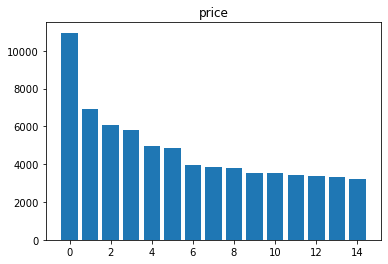

In [23]:
first_quartile = price.describe()['25%']
third_quartile = price.describe()['75%']
iqr = third_quartile - first_quartile
data_new = data[(data['price'] > (first_quartile - 3 * iqr)) &
           (data['price'] < (third_quartile + 3 * iqr))]

col_name='price'
col = data[col_name]
col_2 = col.fillna(int(np.mean(data_new['price']+0.5)))
show_column(col_2)

# 2. 数据集2：Oakland Crime Statistics 2011 to 2016

加载数据

In [24]:
data = pd.read_csv("records-for-2016.csv")
data.drop([len(data)-1],inplace=True)

## 2.1 数据摘要

包括“数据信息”、“缺失值统计”、“数值数据摘要”、“标称数据摘要”共4部分。

### 数据信息

数据集中共有10列，110827行。其中有1列是数值属性，9列是标称属性.

In [25]:
print('%d columns' % len(data.columns))
print('%d rows' % len(data.index))
print(data.dtypes.value_counts())

10 columns
110827 rows
object     9
float64    1
dtype: int64


数据集中的前5行展示如下。

In [26]:
data.head()

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2016-01-01T00:00:57.000,ST&MARKET ST,P1,05X,2.0,415GS,415 GUNSHOTS,LOP160101000003,2016-01-01T00:32:30.000
1,OP,2016-01-01T00:01:25.000,AV&HAMILTON ST,P3,26Y,2.0,415GS,415 GUNSHOTS,LOP160101000005,2016-01-01T00:48:23.000
2,OP,2016-01-01T00:01:43.000,ST&CHESTNUT ST,P1,02X,2.0,415GS,415 GUNSHOTS,LOP160101000008,2016-01-01T00:21:24.000
3,OP,2016-01-01T00:01:48.000,WALLACE ST,P2,18Y,2.0,415GS,415 GUNSHOTS,LOP160101000007,2016-01-01T01:15:03.000
4,OP,2016-01-01T00:02:05.000,90TH AV,P3,34X,2.0,415GS,415 GUNSHOTS,LOP160101000009,2016-01-01T00:54:52.000


### 缺失值统计

统计每一列中的缺失值数量如下。本数据集中没有缺失值。

In [27]:
data.isna().sum()

Agency                         0
Create Time                    0
Location                       0
Area Id                        0
Beat                         580
Priority                       0
Incident Type Id               0
Incident Type Description      0
Event Number                   0
Closed Time                    0
dtype: int64

### 数值数据摘要

统计属性**priority**的数据数量，平均值，标准差，最小值，最大值，第1四分位点，中位数，第3四分位点信息如下。

In [28]:
data.describe()

,Priority
count,110827.000000
mean,1.778438
std,0.415299
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


### 标称属性摘要

统计属性**Location**如下所示。

Colunm name: Location
24046 different values.

                            counts  frequency
 INTERNATIONAL BLVD           2156   0.019454
 AV&INTERNATIONAL BLVD        1829   0.016503
 MACARTHUR BLVD               1813   0.016359
 BROADWAY                     1472   0.013282
 7TH ST                       1223   0.011035
 FOOTHILL BLVD                1052   0.009492
 TELEGRAPH AV                  875   0.007895
 SAN PABLO AV                  765   0.006903
 AV&MACARTHUR BLVD             737   0.006650
 FRUITVALE AV                  709   0.006397
 BANCROFT AV                   707   0.006379
 ST&BROADWAY                   691   0.006235
 HIGH ST                       678   0.006118
 ST&TELEGRAPH AV               638   0.005757
 73RD AV                       595   0.005369
...


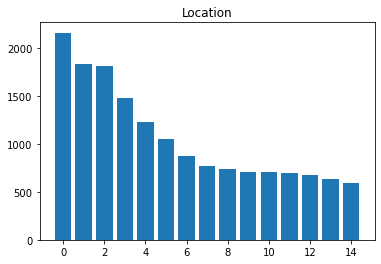

In [29]:
summary_column('Location')

统计属性**Area Id**如下所示。

Colunm name: Area Id
8 different values.

     counts  frequency
P3    47425   0.427919
P1    41419   0.373727
P2    19610   0.176942
POU    2173   0.019607
PCW     194   0.001750
TEC       4   0.000036
WAG       1   0.000009
JLS       1   0.000009


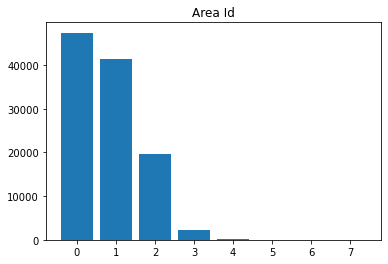

In [30]:
summary_column('Area Id')

统计属性**Beat**如下所示。

Colunm name: Beat
58 different values.

     counts  frequency
04X    4515   0.040739
08X    3931   0.035470
26Y    3511   0.031680
30Y    3473   0.031337
19X    3455   0.031175
30X    3416   0.030823
03X    3195   0.028829
23X    3076   0.027755
34X    2857   0.025779
07X    2831   0.025544
20X    2702   0.024380
29X    2646   0.023875
06X    2580   0.023280
03Y    2562   0.023117
27Y    2517   0.022711
...


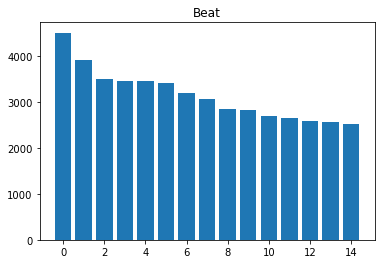

In [31]:
summary_column('Beat')

统计属性**Incident Type Id**如下所示。

Colunm name: Incident Type Id
242 different values.

       counts  frequency
933R    10094   0.091079
415      7883   0.071129
SECCK    7251   0.065426
10851    5308   0.047894
911H     5089   0.045918
5150     4859   0.043843
415C     3701   0.033394
242      3483   0.031427
912      2583   0.023307
949      2504   0.022594
HAZ      2424   0.021872
243E     2310   0.020843
WELCK    2276   0.020537
415GS    2025   0.018272
901A     1730   0.015610
...


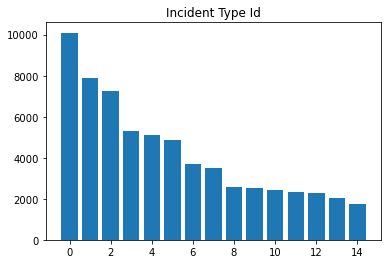

In [32]:
summary_column('Incident Type Id')

## 2.2 处理缺失数据

**处理缺失标称属性**

属性**Beat**中共有110827个数据，其中580个数据为空数据。

In [33]:
col_name = 'Beat'
col = data[col_name]

print('column:', col_name)
print('total:', len(col))
print('nan:', col.isna().sum())

column: Beat
total: 110827
nan: 580


删除属性**Beat**中的空数据，结果统计如下。

     Beat  frequency
04X  4515   0.040953
08X  3931   0.035656
26Y  3511   0.031847
30Y  3473   0.031502
19X  3455   0.031339
30X  3416   0.030985
03X  3195   0.028980
23X  3076   0.027901
34X  2857   0.025915
07X  2831   0.025679
20X  2702   0.024509
29X  2646   0.024001
06X  2580   0.023402
03Y  2562   0.023239
27Y  2517   0.022831
...


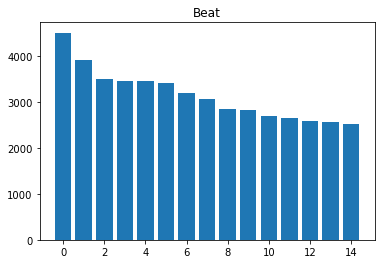

In [34]:
col_1 = col.dropna()
show_column(col_1)

利用属性**Beat**中的众数来填补缺失值。

     Beat  frequency
04X  5095   0.045973
08X  3931   0.035470
26Y  3511   0.031680
30Y  3473   0.031337
19X  3455   0.031175
30X  3416   0.030823
03X  3195   0.028829
23X  3076   0.027755
34X  2857   0.025779
07X  2831   0.025544
20X  2702   0.024380
29X  2646   0.023875
06X  2580   0.023280
03Y  2562   0.023117
27Y  2517   0.022711
...


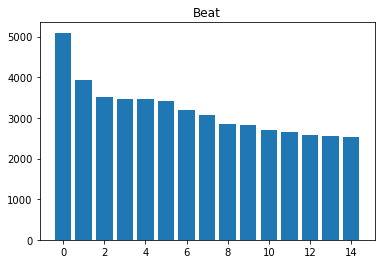

In [35]:
col_2 = col.fillna(col.mode()[0])
show_column(col_2)